In [29]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

data_folder = '../MovieSummaries/'


awards = pd.read_csv('../the_oscar_award.csv')

movies = pd.read_csv(data_folder+'movie.metadata.tsv', delimiter= '\t', header= None, names = ['Wiki_ID', 'Freebase_ID', 'name', 'release_date', 'revenue', 'runtime',
                                                                              'languages', 'countries', 'genres' ])

In [3]:
awards

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False
...,...,...,...,...,...,...,...
10760,2022,2023,95,HONORARY AWARD,"To Euzhan Palcy, a masterful filmmaker who bro...",NaN,True
10761,2022,2023,95,HONORARY AWARD,"To Diane Warren, for her genius, generosity an...",NaN,True
10762,2022,2023,95,HONORARY AWARD,"To Peter Weir, a fearless and consummate filmm...",NaN,True
10763,2022,2023,95,GORDON E. SAWYER AWARD,Iain Neil,NaN,True


In [38]:
awards.describe()

,year_film,year_ceremony,ceremony
count,10765.000000,10765.000000,10765.000000
mean,1976.074222,1977.074222,49.098932
std,27.055841,27.055841,27.013986
min,1927.000000,1928.000000,1.000000
25%,1952.000000,1953.000000,25.000000
50%,1975.000000,1976.000000,48.000000
75%,2000.000000,2001.000000,73.000000
max,2022.000000,2023.000000,95.000000


In [39]:
awards.isna().any()

year_film        False
year_ceremony    False
ceremony         False
category         False
name              True
film              True
winner           False
dtype: bool

Sum of NaN in each feature : 


year_film          0
year_ceremony      0
ceremony           0
category           0
name               4
film             315
winner             0
dtype: int64

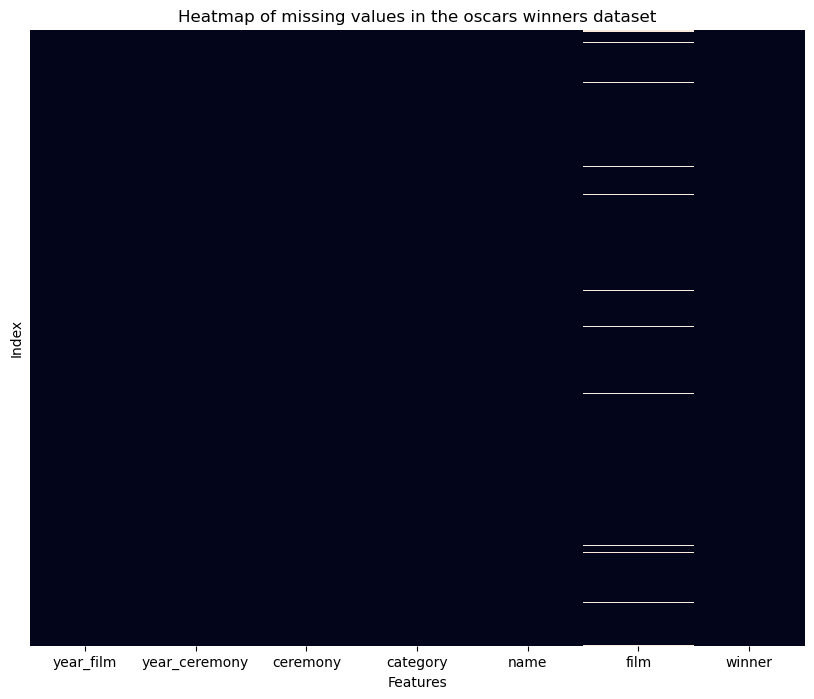

In [40]:
fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(awards.isna(), yticklabels=False, cbar=False)
ax.set(xlabel="Features", ylabel="Index")
ax.set_title('Heatmap of missing values in the oscars winners dataset')

print('Sum of NaN in each feature : ')
awards.isna().sum(axis = 0)

In [42]:
awards = awards.drop(awards[awards['film'].isnull()].index)
awards = awards.drop(awards[awards['name'].isnull()].index)


<BarContainer object of 95 artists>

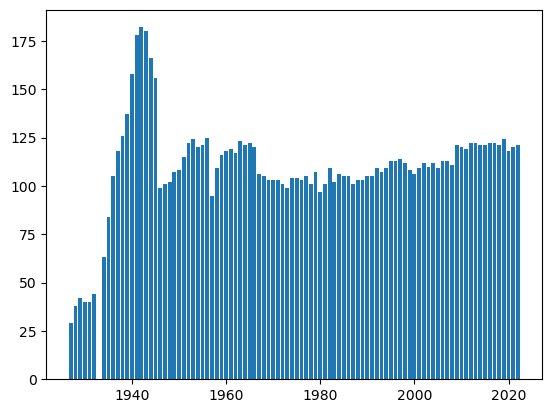

In [43]:
counts = awards['year_film'].value_counts()
plt.bar(counts.index, counts.values)

<BarContainer object of 5 artists>

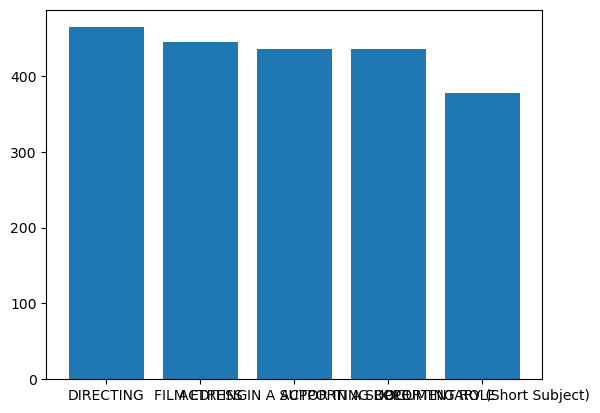

In [44]:
counts = awards['category'].value_counts()
plt.bar(counts.index[:5], counts.values[:5])

In [45]:
counts.index

Index(['DIRECTING', 'FILM EDITING', 'ACTRESS IN A SUPPORTING ROLE',
       'ACTOR IN A SUPPORTING ROLE', 'DOCUMENTARY (Short Subject)',
       'BEST PICTURE', 'DOCUMENTARY (Feature)', 'CINEMATOGRAPHY',
       'FOREIGN LANGUAGE FILM', 'ART DIRECTION',
       ...
       'SHORT FILM (Dramatic Live Action)',
       'MUSIC (Original Song Score or Adaptation Score)',
       'MUSIC (Adaptation Score)', 'UNIQUE AND ARTISTIC PICTURE',
       'DIRECTING (Comedy Picture)',
       'SPECIAL ACHIEVEMENT AWARD (Sound Editing)', 'WRITING (Title Writing)',
       'ENGINEERING EFFECTS', 'SPECIAL ACHIEVEMENT AWARD (Sound Effects)',
       'AWARD OF COMMENDATION'],
      dtype='object', name='category', length=107)

In [48]:
common_films = len(set(awards['film']) & set(movies['name']))

In [50]:
common_films/len(movies['name'])

0.044983545589116845

In [51]:
common_films/len(awards['film'])

0.351866028708134

In [53]:
len(set(map(str.lower, awards['film'])) & set(map(str.lower, movies['name'])))/len(awards['film'])

0.3609569377990431